In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
X = train_data.drop('id', 1)
test_X = test_data.drop('id', 1)

In [4]:
X.describe()

,loan_amnt,interest_rate,credit_score
count,242150.000000,242150.000000,242150.000000
mean,1520.389009,13.801496,683.575024
std,830.250197,4.588924,29.554795
min,323.797279,5.704849,655.424269
25%,761.954545,10.876086,659.531106
50%,1212.680586,13.543833,678.672563
75%,2152.213330,17.172395,698.591960
max,3851.867974,27.980604,808.551641


In [5]:
test_X.describe()

,loan_amnt,interest_rate,credit_score
count,26900.000000,26900.000000,26900.000000
mean,1515.095458,13.778459,683.840319
std,827.710449,4.587711,29.685781
min,353.090088,5.745858,655.435675
25%,753.766957,10.846102,659.589762
50%,1213.754480,13.551492,678.707870
75%,2147.699462,17.128929,698.684676
max,3812.969623,27.503147,811.676356


In [6]:
combine = [X, test_X]
result = pd.concat(combine)

In [7]:
result

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid
...,...,...,...,...,...,...,...,...,...
26895,1169.767130,3 years,13.609916,B4,1 year,credit_card,656.939828,Individual,NaN
26896,2235.153322,3 years,7.248690,A2,10 years,credit_card,765.770393,Individual,NaN
26897,3272.971410,3 years,9.957002,B4,6 years,debt_consolidation,793.887391,Individual,NaN
26898,1607.397707,3 years,10.892554,B3,10 years,debt_consolidation,658.815541,Individual,NaN


#### 1. Deal with **loan amount**

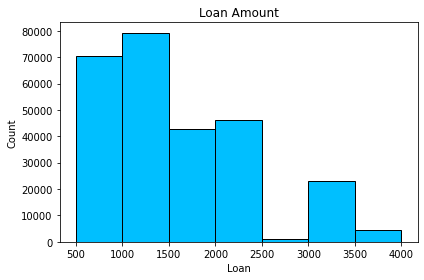

In [8]:
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.hist(result['loan_amnt'], bins=bins, edgecolor='black', color='deepskyblue')
plt.title('Loan Amount')
plt.xlabel('Loan')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

#### Normalize **loan amount**

In [9]:
min_max_scaler = MinMaxScaler()
loan_amnt = result[['loan_amnt']].values
loan_amnt_norm = min_max_scaler.fit_transform(loan_amnt)
result['loan_amnt'] = loan_amnt_norm

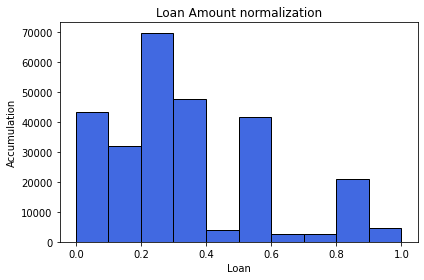

In [10]:
plt.hist(loan_amnt_norm, edgecolor='black', color='royalblue')
plt.title('Loan Amount normalization')
plt.xlabel('Loan')
plt.ylabel('Accumulation')

plt.tight_layout()

plt.show()

#### 2.Deal with **term** by map function

In [11]:
result['term'].value_counts()

3 years    210959
5 years     58091
Name: term, dtype: int64

In [12]:
result['term'] = result['term'].map({'3 years': 0, '5 years': 1})

In [13]:
result['term'].value_counts()

0    210959
1     58091
Name: term, dtype: int64

#### 3.Normalize **interest_rate**

In [14]:
interest_rate = result[['interest_rate']].values
interest_rate_norm = min_max_scaler.fit_transform(interest_rate)
result['interest_rate'] = interest_rate_norm

#### 4.Normalize **credit_score**

In [15]:
credit_score = result[['credit_score']].values
credit_score_norm = min_max_scaler.fit_transform(credit_score)
result['credit_score'] = credit_score_norm

#### 4.Normalize **employment length** 

In [16]:
result['employment_length'].value_counts()

10 years    114823
0 years      21441
9 years      20439
2 years      17513
1 year       16846
6 years      16502
4 years      14863
5 years      14259
7 years      14134
3 years      12529
8 years       5701
Name: employment_length, dtype: int64

In [17]:
emp_years = []
for emp_len in result['employment_length']:
    emp_year = emp_len.split(' ')[0]
    emp_years.append(int(emp_year))
result['employment_length'] = emp_years

In [18]:
emp_len = result[['employment_length']].values
emp_len_norm = min_max_scaler.fit_transform(emp_len)
result["employment_length"] = emp_len_norm

#### Deal with **application type**

In [19]:
result['application_type'] = result['application_type'].map({'Individual': 1, 'Joint App': 0})

#### Categorize **purpose**

In [20]:
result['purpose'].value_counts()

debt_consolidation    177993
credit_card            54318
other                  19608
home_improvement        8525
car                     4296
medical                 3508
small_business           508
major_purchase           288
house                      5
moving                     1
Name: purpose, dtype: int64

In [21]:
dummies = pd.get_dummies(result['purpose'],prefix="purpose_")
result = result.drop('purpose', 1)
result = pd.concat([result, dummies], axis=1)

#### Deal with **grade**

A1 = 30

A2 = 29
..

F5 = 0

In [22]:
result['grade'] = result['grade'].map({'A1': 30, 'A2': 29, 'A3': 28, 'A4': 27, 'A5': 26,
                                       'B1': 25, 'B2': 24, 'B3': 23, 'B4': 22, 'B5': 21,
                                       'C1': 20, 'C2': 19, 'C3': 18, 'C4': 17, 'C5': 16,
                                       'D1': 15, 'D2': 14, 'D3': 13, 'D4': 12, 'D5': 11,
                                       'E1': 10, 'E2': 9, 'E3': 8, 'E4': 7, 'E5': 6,
                                       'F1': 5, 'F2': 4, 'F3': 3, 'F4': 2, 'F5': 1})

In [23]:
grade = result[['grade']].values
grade_norm = min_max_scaler.fit_transform(grade)
result['grade'] = grade_norm

In [24]:
# result['grade'] = result['grade'].map({'A1': 30, 'A2': 29, 'A3': 28, 'A4': 27, 'A5': 26})
# result['grade'] = result['grade'].map({'B1': 25, 'B2': 24, 'B3': 23, 'B4': 22, 'B5': 21})
# result['grade'] = result['grade'].map({'C1': 20, 'C2': 19, 'C3': 18, 'C4': 17, 'C5': 16})
# result['grade'] = result['grade'].map({'D1': 15, 'D2': 14, 'D3': 13, 'D4': 12, 'D5': 11})
# result['grade'] = result['grade'].map({'E1': 10, 'E2': 9, 'E3': 8, 'E4': 7, 'E5': 6})
# result['grade'] = result['grade'].map({'F1': 5, 'F2': 4, 'F3': 3, 'F4': 2, 'F5': 1})

In [25]:
# dummies = pd.get_dummies(result['grade'],prefix="grade_")
# result = result.drop('grade', 1)
# result = pd.concat([result, dummies], axis=1)

In [26]:
result

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,loan_status,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,purpose__house,purpose__major_purchase,purpose__medical,purpose__moving,purpose__other,purpose__small_business
0,0.080922,0,0.121977,0.862069,0.0,0.375275,1,FullyPaid,0,0,1,0,0,0,0,0,0,0
1,0.243609,1,0.205691,0.827586,1.0,0.270604,1,ChargedOff,0,1,0,0,0,0,0,0,0,0
2,0.105436,0,0.404861,0.620690,0.1,0.006368,1,FullyPaid,0,0,1,0,0,0,0,0,0,0
3,0.117513,0,0.384088,0.655172,0.0,0.015888,1,FullyPaid,0,1,0,0,0,0,0,0,0,0
4,0.373746,1,0.875957,0.172414,1.0,0.048307,1,FullyPaid,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,0.239783,0,0.354873,0.724138,0.1,0.009699,1,NaN,0,1,0,0,0,0,0,0,0,0
26896,0.541757,0,0.069306,0.965517,1.0,0.706206,1,NaN,0,1,0,0,0,0,0,0,0,0
26897,0.835917,0,0.190887,0.724138,0.6,0.886152,1,NaN,0,0,1,0,0,0,0,0,0,0
26898,0.363825,0,0.232886,0.758621,1.0,0.021704,1,NaN,0,0,1,0,0,0,0,0,0,0


In [27]:
y = train_data['loan_status']
y.value_counts()

FullyPaid     199794
ChargedOff     42356
Name: loan_status, dtype: int64

In [28]:
y =y.map({'FullyPaid': 1, 'ChargedOff': 0})

In [29]:
y.value_counts()

1    199794
0     42356
Name: loan_status, dtype: int64

In [30]:
result = result.fillna(0)

In [31]:
X = result[result['loan_status'] != 0] 
X = X.drop('loan_status', 1)
X

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,purpose__house,purpose__major_purchase,purpose__medical,purpose__moving,purpose__other,purpose__small_business
0,0.080922,0,0.121977,0.862069,0.0,0.375275,1,0,0,1,0,0,0,0,0,0,0
1,0.243609,1,0.205691,0.827586,1.0,0.270604,1,0,1,0,0,0,0,0,0,0,0
2,0.105436,0,0.404861,0.620690,0.1,0.006368,1,0,0,1,0,0,0,0,0,0,0
3,0.117513,0,0.384088,0.655172,0.0,0.015888,1,0,1,0,0,0,0,0,0,0,0
4,0.373746,1,0.875957,0.172414,1.0,0.048307,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242145,0.596400,0,0.357741,0.724138,0.8,0.011406,1,0,0,1,0,0,0,0,0,0,0
242146,0.255253,0,0.273335,0.758621,1.0,0.283764,1,0,0,1,0,0,0,0,0,0,0
242147,0.500476,0,0.112826,0.896552,0.1,0.442439,1,0,0,0,0,0,0,0,0,1,0
242148,0.888749,0,0.411708,0.620690,0.9,0.210078,1,0,0,1,0,0,0,0,0,0,0


In [32]:
test_X = result[result['loan_status'] == 0] 
test_X = test_X.drop('loan_status', 1)
test_X

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,purpose__house,purpose__major_purchase,purpose__medical,purpose__moving,purpose__other,purpose__small_business
0,0.237533,0,0.332223,0.655172,1.0,0.170185,1,0,1,0,0,0,0,0,0,0,0
1,0.548081,1,0.381192,0.517241,1.0,0.082022,1,0,0,1,0,0,0,0,0,0,0
2,0.526730,0,0.116850,0.862069,1.0,0.306258,1,0,1,0,0,0,0,0,0,0,0
3,0.055693,0,0.056189,0.965517,0.7,0.484566,1,0,0,1,0,0,0,0,0,0,0
4,0.561086,0,0.267270,0.758621,0.6,0.274843,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,0.239783,0,0.354873,0.724138,0.1,0.009699,1,0,1,0,0,0,0,0,0,0,0
26896,0.541757,0,0.069306,0.965517,1.0,0.706206,1,0,1,0,0,0,0,0,0,0,0
26897,0.835917,0,0.190887,0.724138,0.6,0.886152,1,0,0,1,0,0,0,0,0,0,0
26898,0.363825,0,0.232886,0.758621,1.0,0.021704,1,0,0,1,0,0,0,0,0,0,0


In [33]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#### Logistic

In [34]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_X, train_y)
print('Accuracy of logistic regression classifier on val set: {:.2f}'.format(logreg.score(val_X, val_y)))

Accuracy of logistic regression classifier on val set: 0.83


In [35]:
test_preds_logreg = logreg.predict(test_X)

In [36]:
output_reg = pd.DataFrame({'id': test_data.id,
                       'Output': test_preds_logreg})
# output_reg.to_csv('submission_v8.csv', index=False)

#### MLP

In [37]:
clf = MLPClassifier(solver='adam', alpha=1e-1, activation='logistic',
        hidden_layer_sizes=(64, 64), batch_size=8, random_state=1)
clf.fit(train_X, train_y)
print('Accuracy of MLPClassifier on val set: {:.2f}'.format(clf.score(val_X, val_y)))

Accuracy of MLPClassifier on val set: 0.82


In [38]:
test_preds_clf = clf.predict(test_X)

In [39]:
output = pd.DataFrame({'id': test_data.id,
                       'Output': test_preds_clf})
# output.to_csv('submission_v9.csv', index=False)